In [88]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [130]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data =[[0],[0],[0],[1],[1],[1]]

In [131]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [132]:
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [133]:
H = tf.sigmoid(tf.matmul(X, W) + b)

In [234]:
cost = -tf.reduce_mean(Y*tf.log(H)+(1-Y)*(tf.log(1-H)))

In [235]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.002)

In [236]:
train = optimizer.minimize(cost)

In [237]:
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [238]:
sess = tf.Session()

In [239]:
sess.run(tf.global_variables_initializer())

In [240]:
steps = []
costs = []

for step in range(20001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 500 == 0:
        print (step, "Cost: {:.2f}".format(cost_val))
        costs.append(cost_val)
        steps.append(step)

# Accuracy report
hypo_val, predict_val, acc_val = sess.run([H, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
print("\nHypothesis : ", hypo_val, "\nCorrect(Y) : ", predict_val, "\nAccuracy : ", acc_val)

0 Cost: 1.70
500 Cost: 0.84
1000 Cost: 0.69
1500 Cost: 0.61
2000 Cost: 0.55
2500 Cost: 0.51
3000 Cost: 0.49
3500 Cost: 0.47
4000 Cost: 0.45
4500 Cost: 0.44
5000 Cost: 0.43
5500 Cost: 0.42
6000 Cost: 0.41
6500 Cost: 0.40
7000 Cost: 0.39
7500 Cost: 0.39
8000 Cost: 0.38
8500 Cost: 0.37
9000 Cost: 0.37
9500 Cost: 0.36
10000 Cost: 0.36
10500 Cost: 0.35
11000 Cost: 0.35
11500 Cost: 0.34
12000 Cost: 0.33
12500 Cost: 0.33
13000 Cost: 0.32
13500 Cost: 0.32
14000 Cost: 0.32
14500 Cost: 0.31
15000 Cost: 0.31
15500 Cost: 0.30
16000 Cost: 0.30
16500 Cost: 0.29
17000 Cost: 0.29
17500 Cost: 0.29
18000 Cost: 0.28
18500 Cost: 0.28
19000 Cost: 0.27
19500 Cost: 0.27
20000 Cost: 0.27

Hypothesis :  [[0.09195545]
 [0.2011174 ]
 [0.522786  ]
 [0.6932267 ]
 [0.8713036 ]
 [0.9607003 ]] 
Correct(Y) :  [[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy :  0.8333333


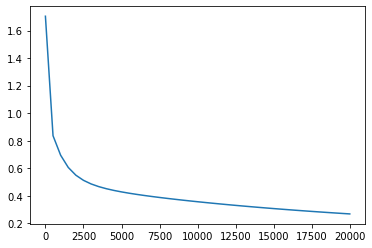

In [242]:
plt.plot(steps, costs)